<div style="text-align: center">
<b><font size=6>ChEn 3603 Homework 7 Problem 1
    </font></b>
</div>

<div class="alert alert-block alert-danger">

&copy; 2020 This material is copyright protected. Distributing this material in any form without written permission from Professor Sutherland is prohibited and may result in academic discipline.

Using the _T-x-y_ data for Methanol-Water in SHR Table 4.1(b), answer the questions below.

# Part 1 (2 pts)
A mixture of 70 mol% methanol is brought to its dew point. What is its temperature, and what is the composition of the first droplet that forms? Also show your results graphically on a _T-x-y_ diagram.

From the _T-x-y_ diagram, we find the dew point to be 
\begin{align}
    T &= 76\,^{\circ}\mathrm{C},\\
    x_{A} &= 0.36.
\end{align}

This is shown graphically in the figure below.

# Part 2 (2 pts)
From the _T-x-y_ diagram, we find the bubble point to be 
\begin{align}
    T &= 69\,^{\circ}\mathrm{C},\\
    y_{A} &= 0.87.
\end{align}

This is shown graphically in the figure below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

T = np.array([ 64.5, 66, 69.3, 73.1, 78, 84.4, 89.3, 93.5, 100 ])
y = np.array([ 1, 0.958, 0.87, 0.779, 0.665, 0.517, 0.365, 0.23, 0 ])
x = np.array([ 1, 0.9,   0.7,  0.5,   0.3,   0.15,  0.08,  0.04, 0 ])

Dew    point: T=76 C  x_A=0.36
Bubble point: T=69 C  y_A=0.87



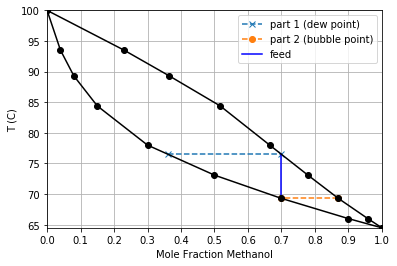

In [2]:
z  = 0.7  # the composition of the feed
VF = 0.8  # fraction vaporized

# Parts 1 and 2 -- Bubble and Dew points:

# find the dew point
Tdew = interp1d( y, T )(z   )
xdew = interp1d( T, x )(Tdew)

# find the bubble point
Tbub = interp1d( x, T )(z   )
ybub = interp1d( T, y )(Tbub)

print('Dew    point: T={:.0f} C  x_A={:.2f}'.format(Tdew,xdew))
print('Bubble point: T={:.0f} C  y_A={:.2f}\n'.format(Tbub,ybub))

plt.plot([xdew,z],[Tdew,Tdew],'--x')
plt.plot([ybub,z],[Tbub,Tbub],'--o')
plt.plot([z,z],   [Tdew,Tbub],'b-')
plt.xticks(np.arange(0,1.1,0.1))
plt.legend(['part 1 (dew point)','part 2 (bubble point)','feed'])

plt.plot(x,T,'ko-',y,T,'ko-')
plt.xlabel('Mole Fraction Methanol')
plt.ylabel('T (C)')
plt.xlim([0,1])
plt.ylim([min(T),max(T)])
plt.grid(True)
plt.show()

# Part 3 (3 pts)
If the mixture from part 1 is condensed until 80% of the mixture is vapor, what is the corresponding temperature and composition of the vapor and liquid? Do this using the _T-x-y_ diagram and the inverse lever arm rule.

The figure below shows the _T-x-y_ diagram with the results of the inverse lever arm rule giving $\frac{V}{F}=0.8$. We read the resulting temperature and composition as 
\begin{align}
    T &= 74^{\circ}\text{C} \\
    y_{A} &= 0.76 \\
    x_{A} &= 0.46
\end{align}

Composition of the system when 80% vapor remains:
	Vapor : 0.759
	Liquid: 0.465
	T (C) : 74.0


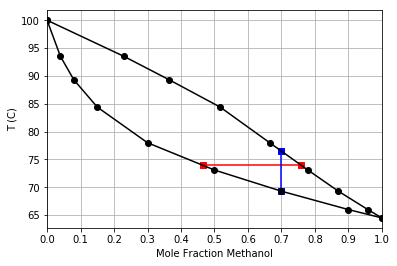

In [3]:
from scipy.optimize import newton

# PART 3: The flash calculation at the specified V/F

# Method 1: Using inverse lever arm rule.
# Given a temperature, interpolate the data to get the equilibrium x and y
# and then calculate the V/F for that.  Then obtain the residual:
fun = lambda TT: ( z-interp1d(T,x)(TT) )/( interp1d(T,y)(TT)-interp1d(T,x)(TT) ) - VF

# fzero to solve for the temperature where the V/F is the specified value.
TT = newton( fun, (Tbub+Tdew)/2 )

# find the composition of vapor and liquid
xx = interp1d(T,x)(TT);
yy = interp1d(T,y)(TT);

plt.plot([xx,yy],[TT,TT],'r-s')
plt.plot([z,z],[Tdew,Tbub],'b-s')
plt.plot(x,T,'ko-',y,T,'ko-')
plt.xticks(np.arange(0,1.1,0.1))
plt.xlabel('Mole Fraction Methanol');
plt.ylabel('T (C)');
plt.xlim([0,1])
plt.grid(True)
plt.show

print('Composition of the system when {:0.0f}% vapor remains:'.format(VF*100))
print('\tVapor : {:0.3f}'.format(yy))
print('\tLiquid: {:0.3f}'.format(xx))
print('\tT (C) : {:0.1f}'.format(TT))

# Part 4 (3 pts)
Repeat part (3) using the $q$-line. Plot the results on an _x-y_ diagram.

From the class notes, the $q$-line is given as 
\begin{equation}
y_{A} = \left[\frac{\frac{V}{F}-1}{\frac{V}{F}}\right]x_{A}+\frac{z_{A}}{\frac{V}{F}}
\end{equation}
with $\frac{V}{F}=0.8$ so that the slope is $\frac{-1}{4}$. 
We draw this line starting from the $45^{\circ}$ line at $y_{A}=x_{A}=z_{A}$ and find the location where it intersects the equilibrium curve, as shown in the figure below.
This gives a composition of 
\begin{align}
    x_{A} &\approx	0.46, \\
    y_{A} &\approx	0.76. 
\end{align}
With these compositions, we can determine the temperature from the _T-x-y_ diagram above as 
\begin{equation}
    T\approx74\,\mathrm{C}.
\end{equation}

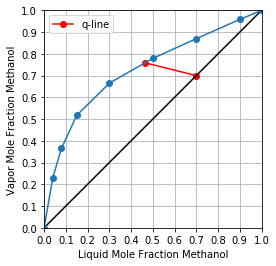

The composition for 80% vaporization is:
	Vapor: 0.76
	Liquid: 0.46
	T (C) : 74.0



In [5]:
# PART 4: Using the q-line and the x-y data:
m = (VF-1)/VF   # the slope of the q-line
yq = lambda xx: m*(xx-z)+z  #  the equation for the q-line in terms of the slope and one data point (z)

# create a residual function that will be zero when the equilibrium curve
# intersects the q-line.  Here we interpolate the equilibrium data to "xx"
# and calculate the value of the q-line at "xx" and find the value of "xx"
# that makes these equal using fzero
fun = lambda xx: interp1d(x,y)(xx)-yq(xx)

# solve for the liquid composition at which we hit the equilibrium curve
xx = newton(fun,z)

# determine the vapor composition through interpolation:
yy = interp1d(x,y)(xx)

# plot this on the x-y diagram
plt.axes().set_aspect('equal','box')  # make the plot square
plt.plot([z,xx],[z,yq(xx)],'ro-',label='q-line')
plt.plot([0,1],[0,1],'k-',x,y,'o-')
plt.xlabel('Liquid Mole Fraction Methanol')
plt.ylabel('Vapor Mole Fraction Methanol')
plt.grid(True)
plt.legend()
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

print('The composition for {:.0f}% vaporization is:\n\tVapor: {:.2f}\n\tLiquid: {:.2f}\n\tT (C) : {:.1f}\n'.format(VF*100,yy,xx,TT))